# Задание

Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков?

Набор данных: https://www.kaggle.com/carlolepelaars/toy-dataset

# Ход выполнения работы

## Текстовое описание набора данных

Вымышленный набор данных для исследовательского анализа данных (EDA) и тестирования простых моделей прогнозирования.

Этот игрушечный набор данных содержит 150 000 строк и 6 столбцов.

Столбцы:

* `Number` – просто порядковый номер строки
* `City` – место нахождения человека (Dallas, New York City, Los Angeles, Mountain View, Boston, Washington D.C., San Diego и Austin)
* `Gender` – пол человека: мужской (Male) или женский (Female)
* `Age` – возраст человека
* `Income` – годовой доход человека (В диапазоне от -674 до 177175)
* `Illness` – человек болен (Yes or No)

## Основные характеристики набора данных

Подключаем все необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

Подключаем Dataset

In [2]:
data = pd.read_csv('toy_dataset.csv', sep=",")

Размер набора данных

In [3]:
data.shape

(150000, 6)

Типы колонок

In [4]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

Проверяем, есть ли пропущенные значения

In [5]:
data.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

Первые 5 строк датасета

In [6]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


Зададим ширину текста, чтобы он влезал на A4

In [7]:
pd.set_option("display.width", 70)

## Визуальное исследование датасета

Оценим наиболее распространённый пол

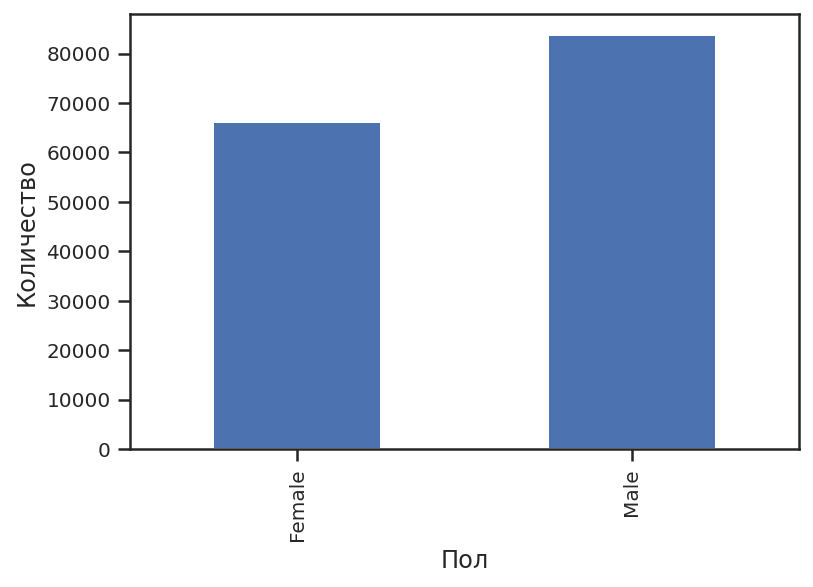

In [8]:
count_full = data.groupby("Gender")["Gender"].count().sort_values()
count_full.plot(x="Пол", y="Количество", kind="bar", fontsize=10)
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.show()

Вилно, что количество женьшин больше количества мужчин

Оценим соотношение здоровых и больных

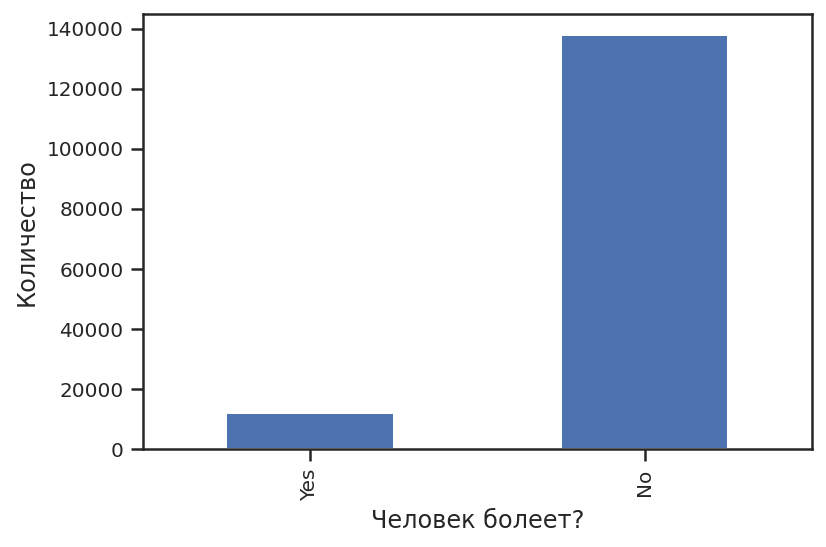

In [9]:
count_full = data.groupby("Illness")["Illness"].count().sort_values()
count_full.plot(x="Человек болен?", y="Количество", kind="bar", fontsize=10)
plt.xlabel("Человек болеет?")
plt.ylabel("Количество")
plt.show()

Видно, что из всей выборки больных меньше 20000 человек

### Диаграммы рассеяния

Диаграмма рассеяния, показывающая зависимость пола от рналичия заболевания

<AxesSubplot:xlabel='Illness', ylabel='Gender'>

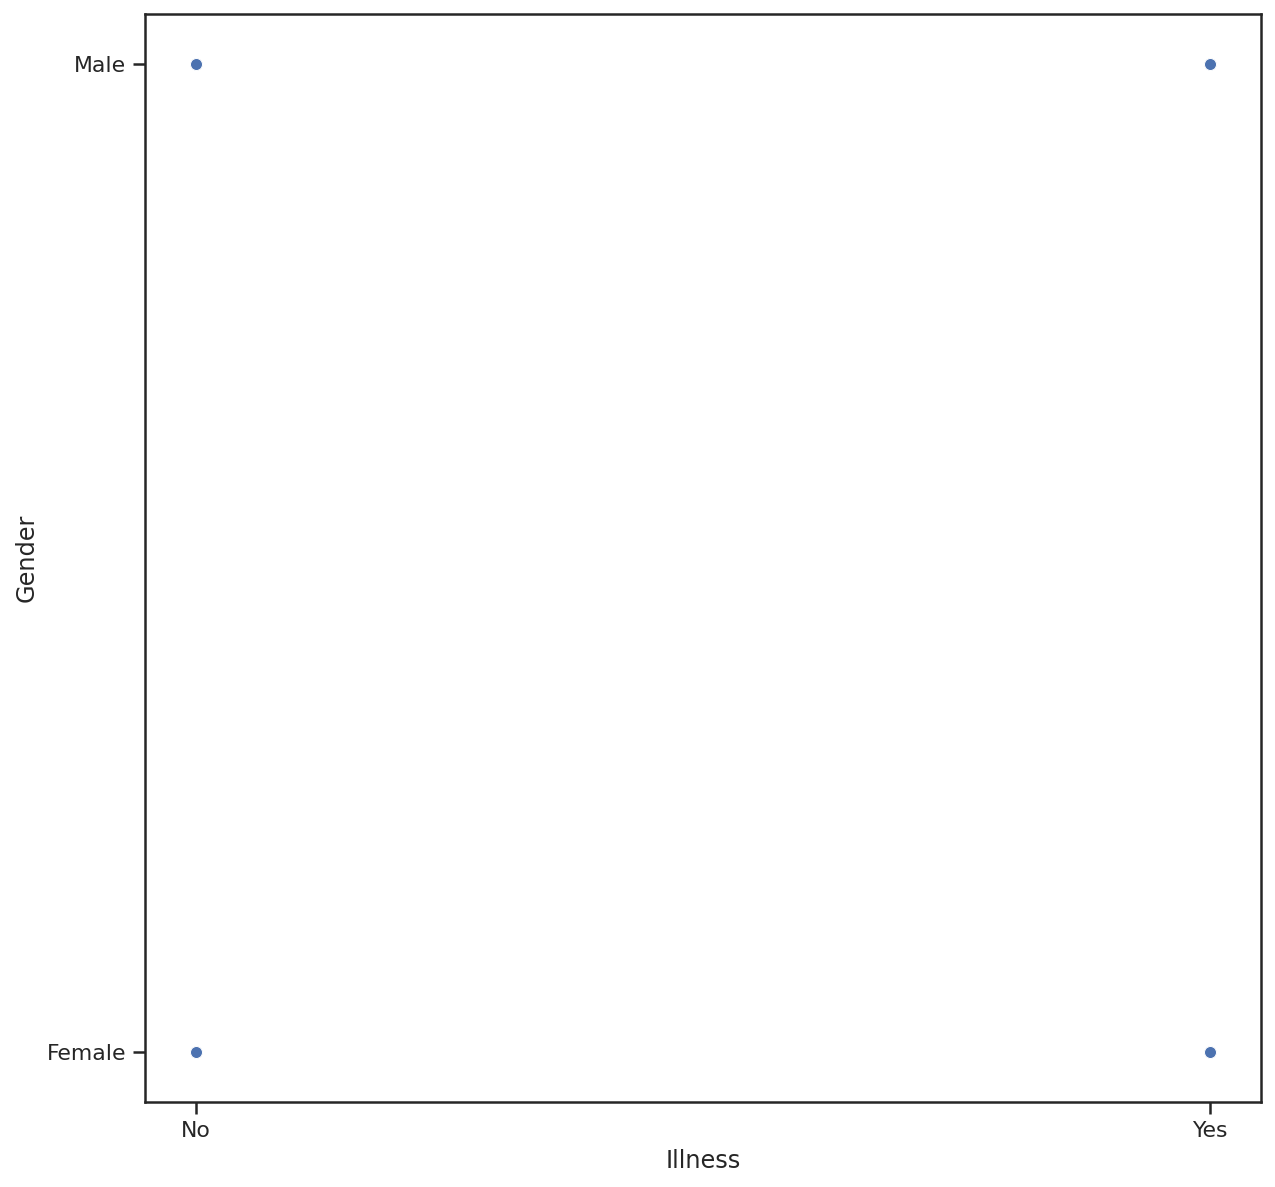

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Illness', y='Gender', data=data)

Из ланной диаграммы (на ней всего 4 точки) следует, что есть в любом поле как здоровые, так и больные люди

### Гистограммы

Гистограмма распределения возраста человека

<AxesSubplot:xlabel='Age', ylabel='Count'>

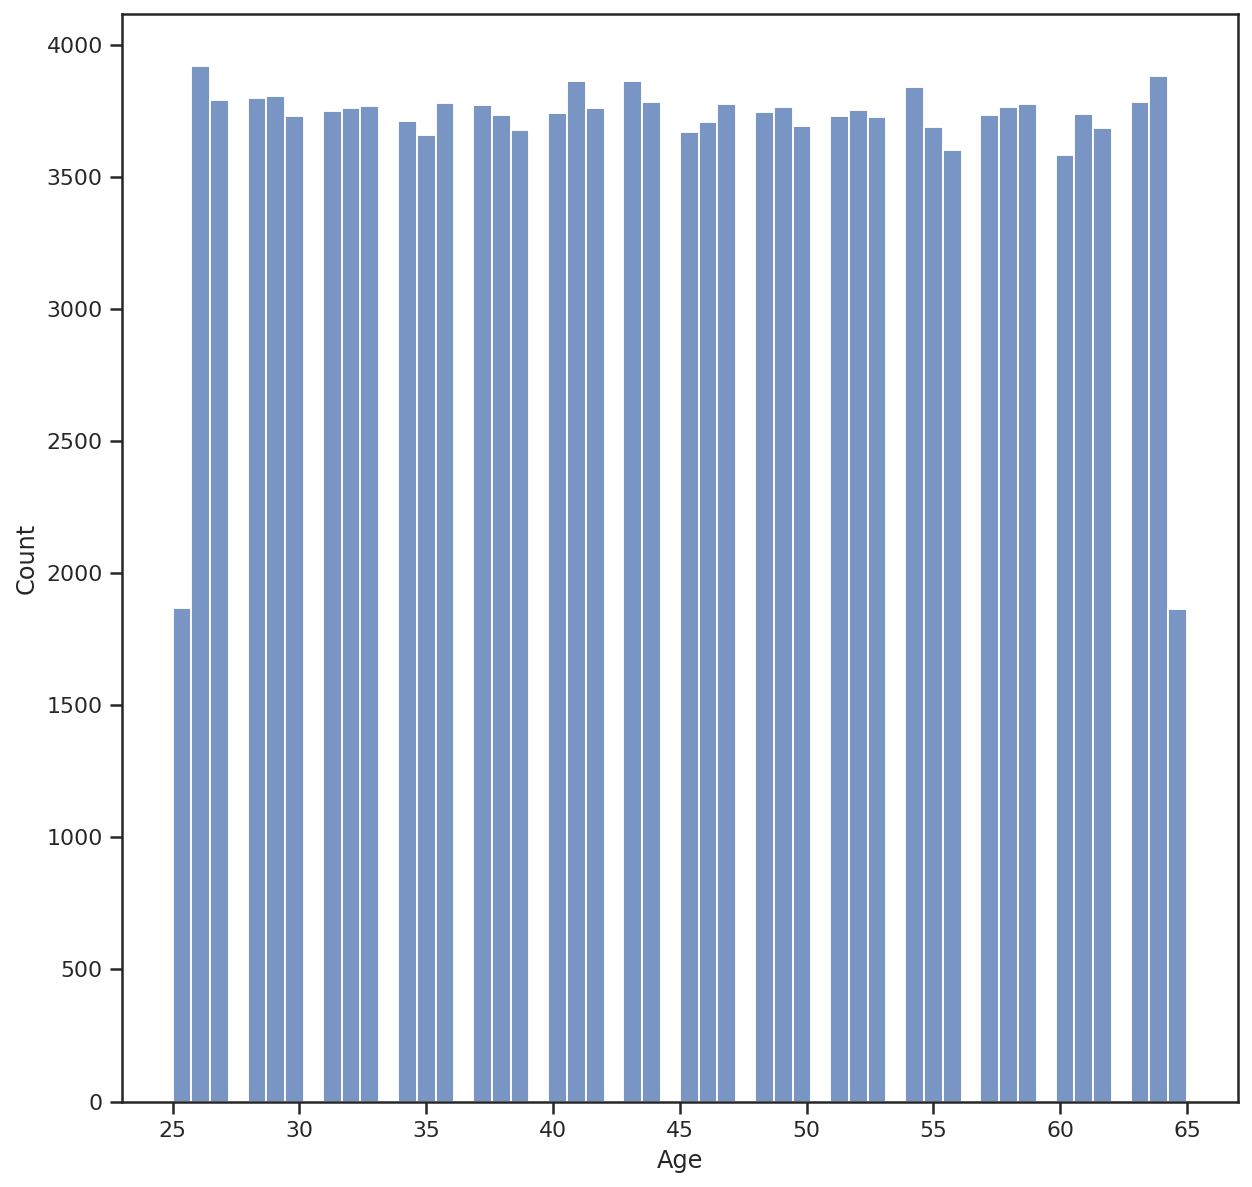

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data['Age'])

Распределение не соответствк=ует закону нормального распределения. Самый распространённый возраст расположен рядом с левым краем диаграммы. На диаграмме видно много пропущенных возрастов.

Рассмотрим гистограмму распределения дохода

<AxesSubplot:xlabel='Income', ylabel='Count'>

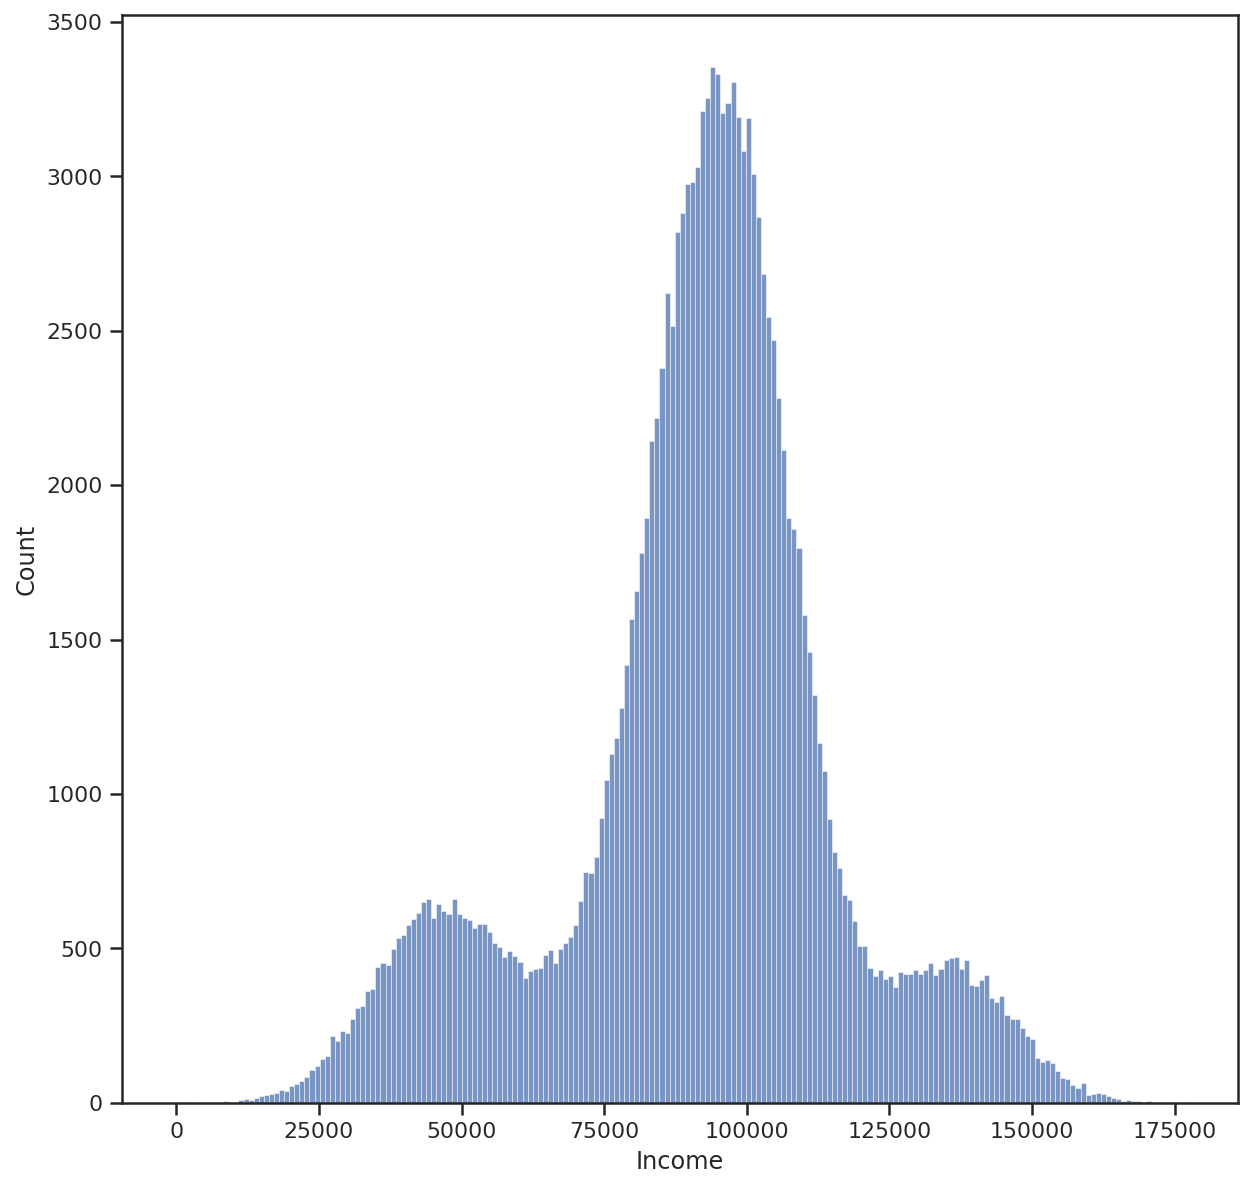

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data['Income'])

Эта гистограмма намного лучше соответствует нормальному распределению, чем предыдущая. Больше всего людей со средним доходом.

Теперь рассмотрим распространённость городов, в которых живут люди

<AxesSubplot:xlabel='City', ylabel='Count'>

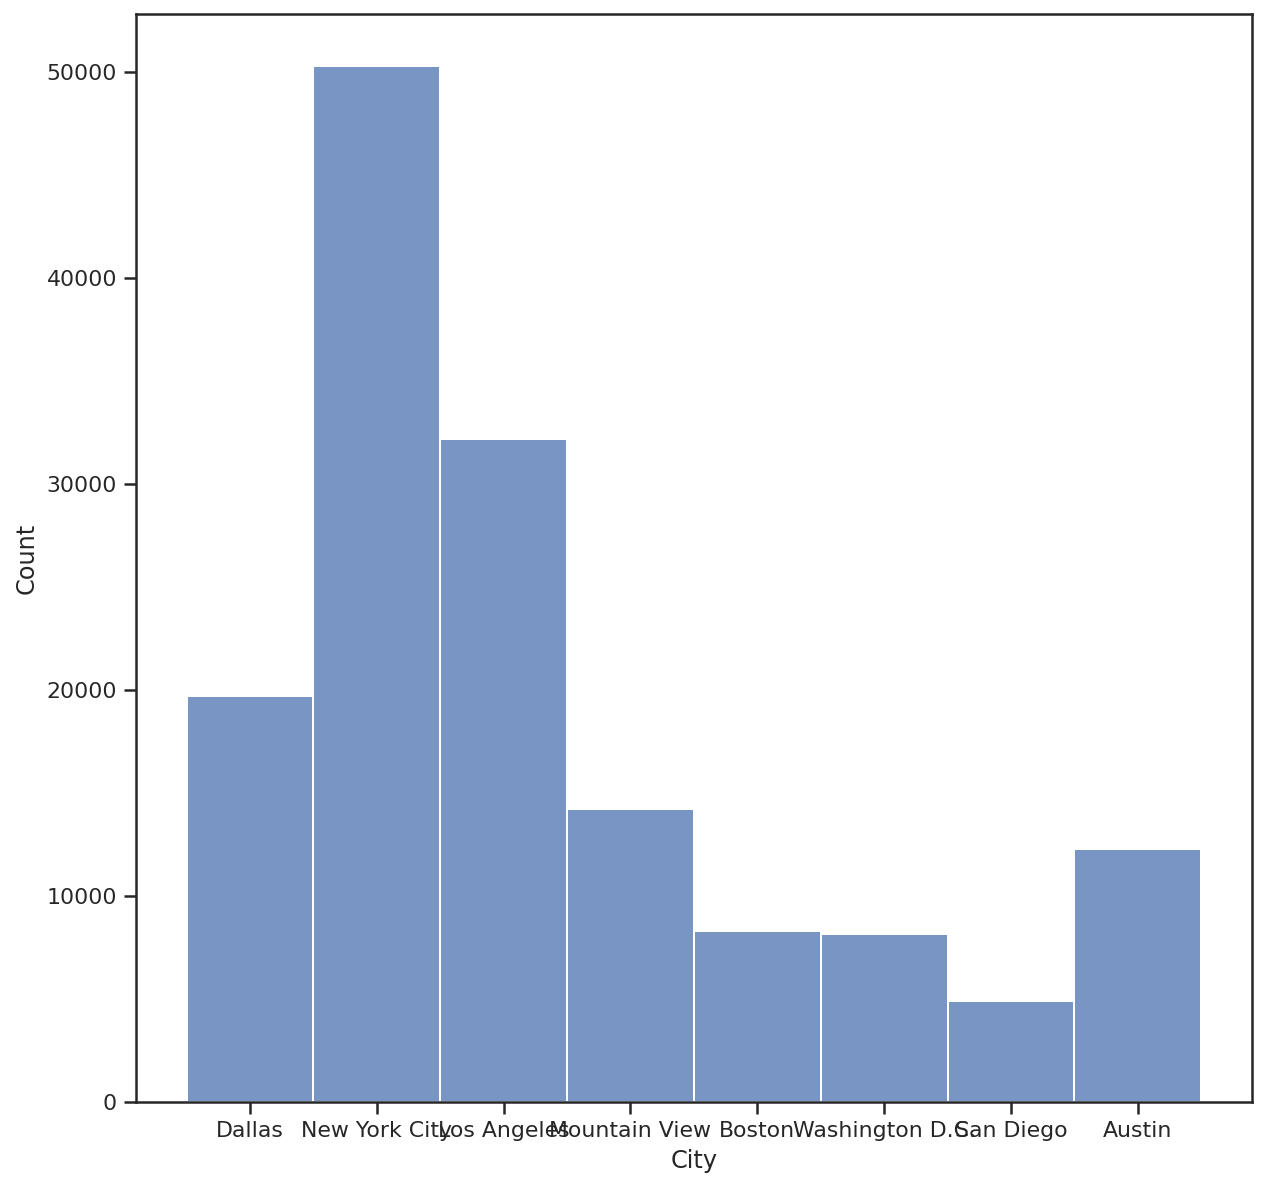

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data['City'])

Видно, что самый распространённый город - New York, что ожидаемо, поскольку это столица США.

### Парные диаграммы

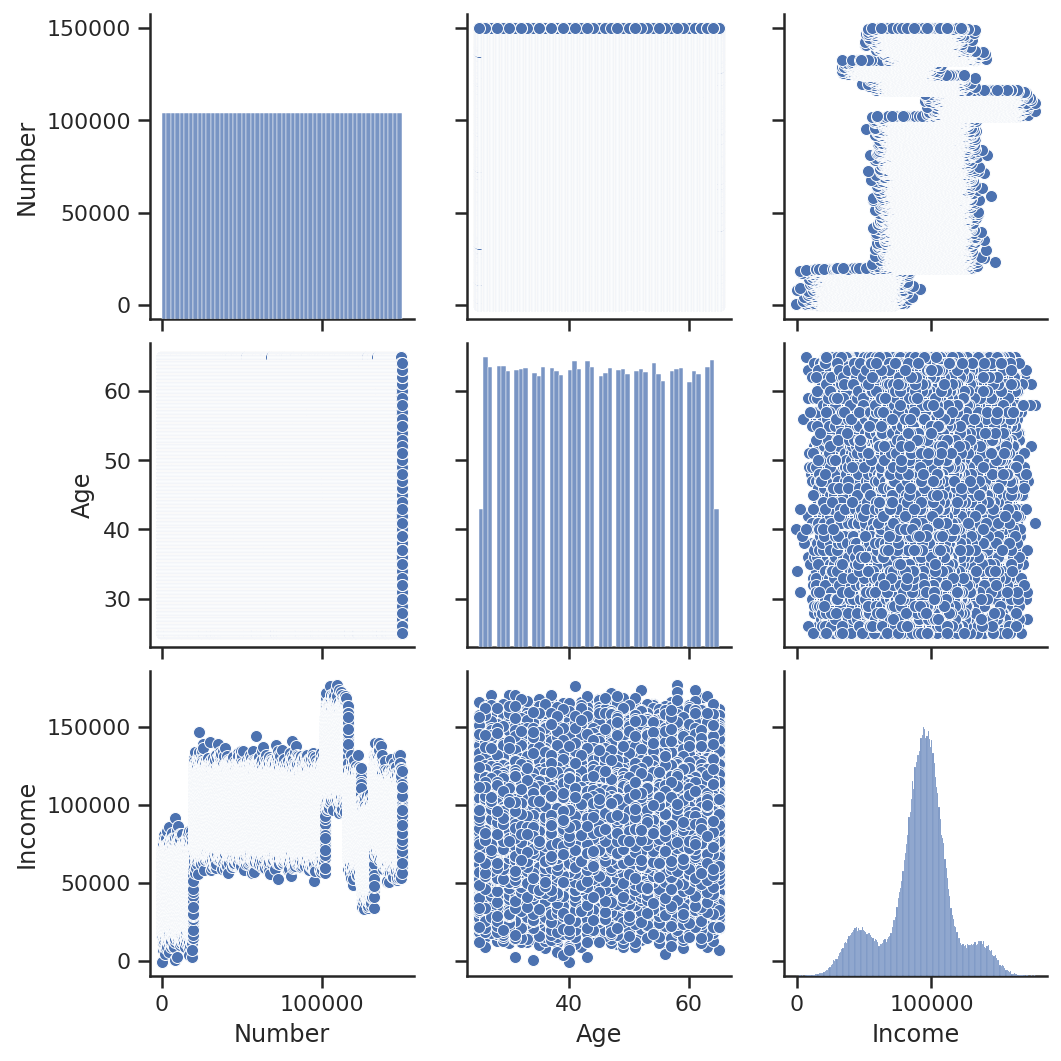

In [14]:
sns.pairplot(data)

Парные диаграммы позволяют построить большенство диаграмм. На них присутствуют также бессмысленные сравнения данных с порпядковым номером (Number)

## Информация о кореляции признаков

Построим тепловую карту набора данных

<AxesSubplot:>

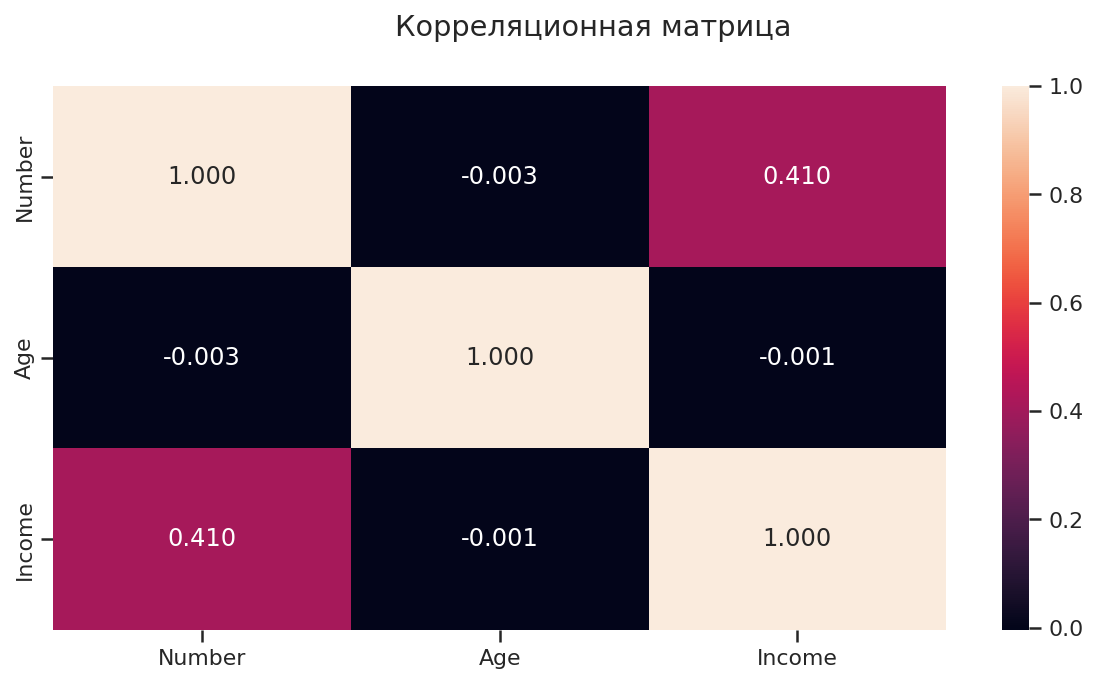

In [15]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')

Из кореляционной матрицы видно, что сильнее всего корелирует порядковый номер с доходом.
Поскольку порядковый номер не представляет ценности для анализа - его можно удалить.

Закодируем целевой признак и построим матрицу ещё раз

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
le = LabelEncoder()
result_le = le.fit_transform(data['Illness'])

In [18]:
data['Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
arr_result_encoded = np.unique(result_le)
arr_result_encoded

array([0, 1])

In [20]:
data_digit = data.copy()
data_digit['Illness'] = result_le

In [21]:
data_digit.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,0
1,2,Dallas,Male,54,45084.0,0
2,3,Dallas,Male,42,52483.0,0
3,4,Dallas,Male,40,40941.0,0
4,5,Dallas,Male,46,50289.0,0


<AxesSubplot:>

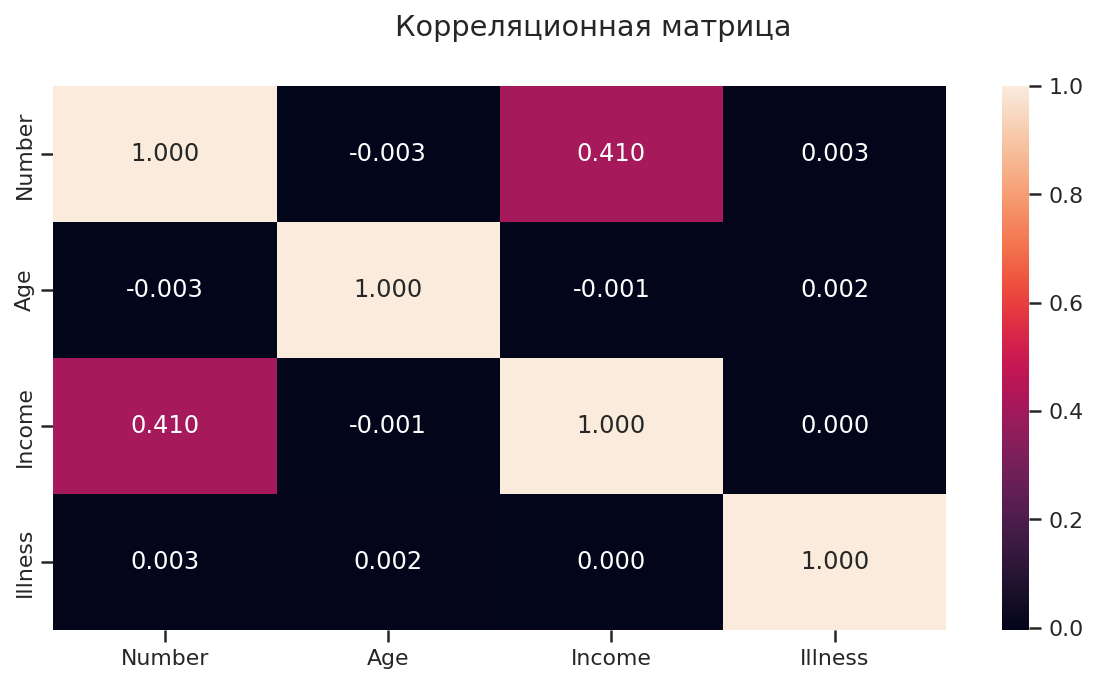

In [22]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data_digit.corr(), ax=ax, annot=True, fmt='.3f')

Как видно, уже имеющиеся числовые колонки почти не корелируют с целевым признаком.

## Визуальное исследование набора данных (часть 2)

### Парные диаграммы

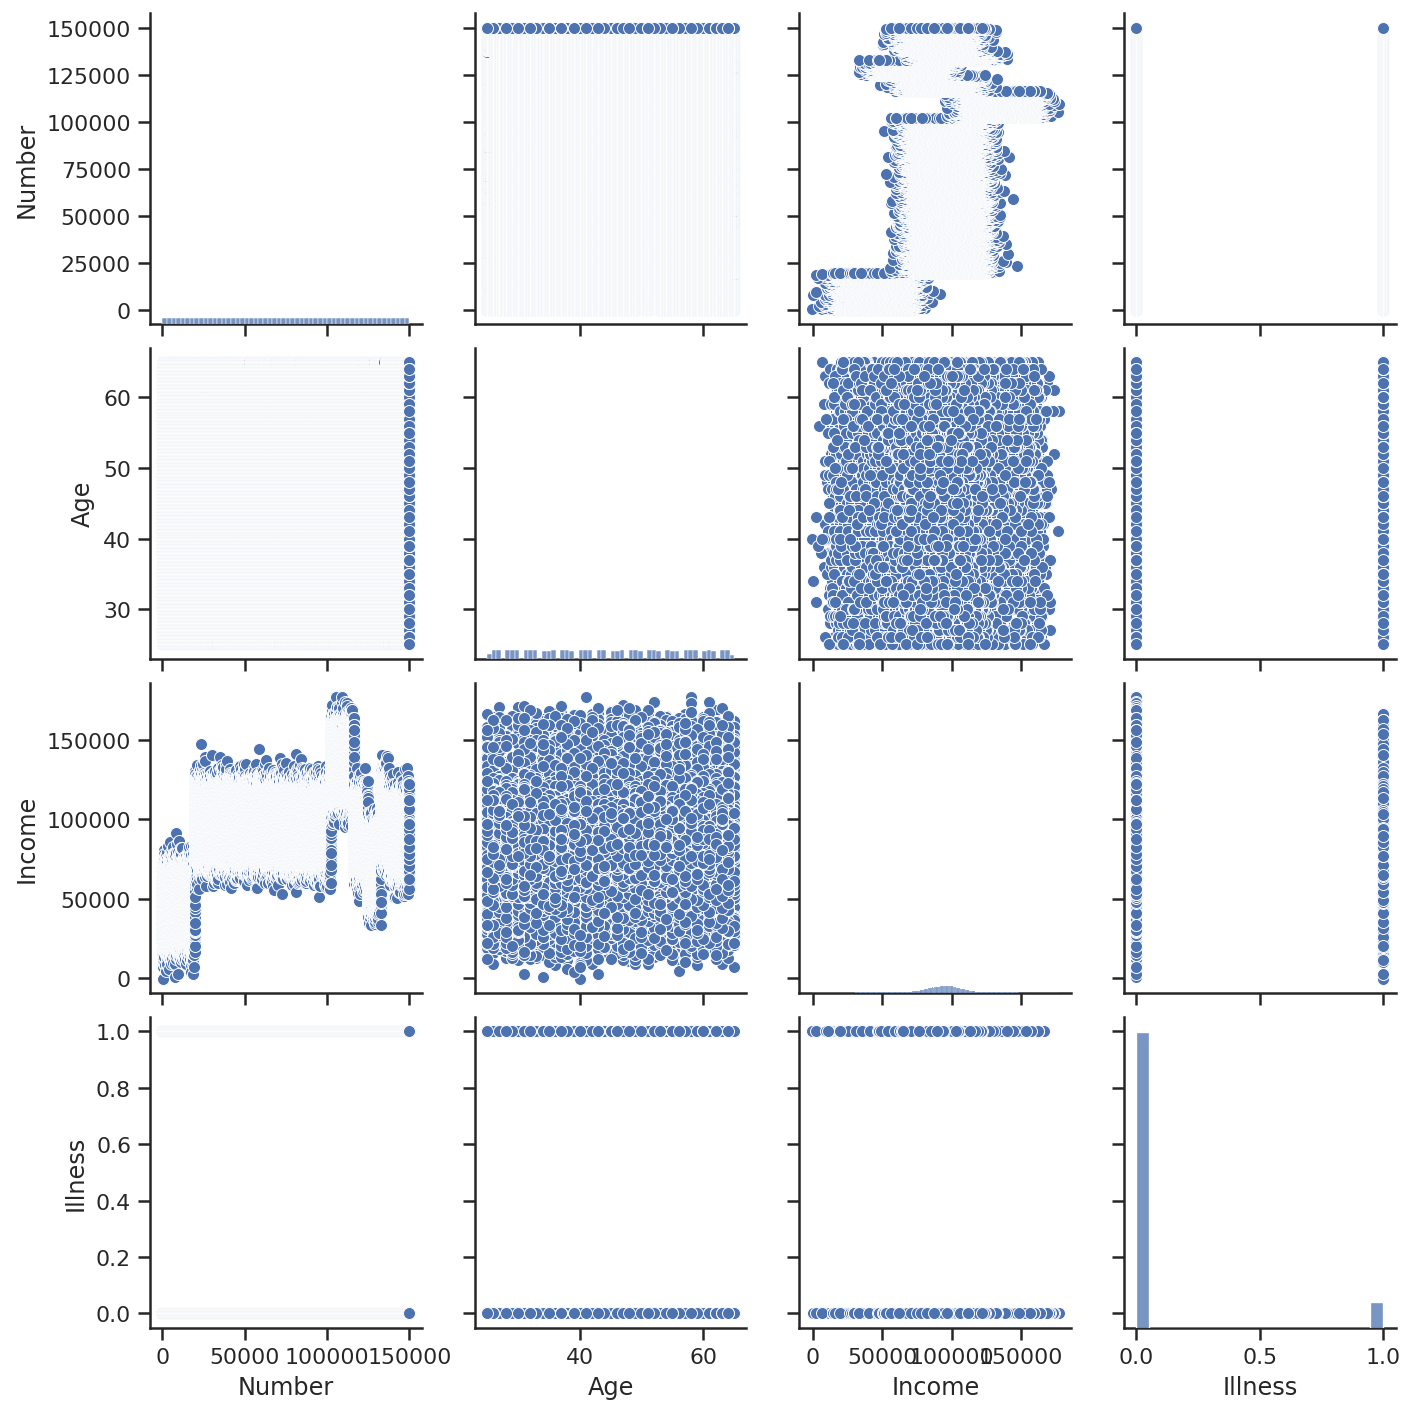

In [23]:
sns.pairplot(data_digit)

Из появившихся отношений видно, что целевой признак распределён не совсем равномерно

# Выводы

На основании построенных можно сделать вывод, о том, что набор данных не полностью соответствует нормальному распределению, но его можно использовать для машинного обучения, исключив столбец `Number`, поскольку он даёт фиктивную кореляцию с доходом.